<a href="https://colab.research.google.com/github/alexanderthclark/Stats1101/blob/main/Interactives/TheHistogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Histogram

This notebook generates random integers between 0 and 100 and then plots a histogram for the distribution.

The notebook will draw the same random numbers for a specified value of `number_of_values` each time, so you can adjust `class_intervals` to see how the changing the intervals changes the shape of the histogram for the same data.

<tt>🤖 **Values obtained**:</tt>

[40 15 72 22 43 82 75  7 34 49]


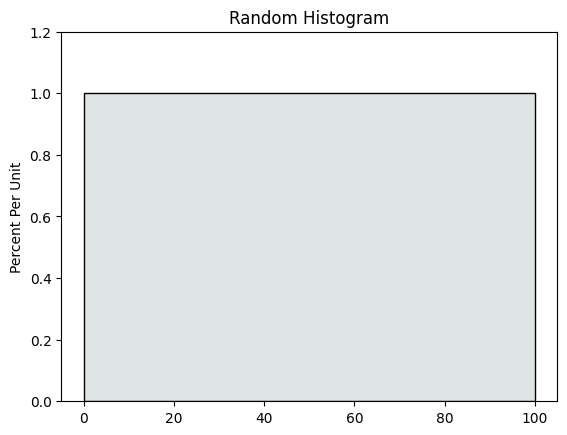

**Class Intervals**

[0.0, 100.0]: 10 (100.0%%)


In [4]:
# @title Start Notebook
#!pip install statwrap
#import statwrap
#%use_fpp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2)
from IPython.display import Markdown as md
from IPython.display import clear_output, display

# @markdown #### How many values?
number_of_values = 10 # @param {type:"slider", min:10, max:100, step:1}

# @markdown #### What are the class interval boundaries?
# @markdown Enter a comma separated sequence of numbers.
# @markdown Intervals include the left boundary and exclude the right boundary. The last interval includes both boundaries, however.
class_intervals = '0,100' # @param {type:"string"}
clear_output()

nums = np.random.randint(0, 100, size=number_of_values)
display(md('<tt>🤖 **Values obtained**:</tt>'))
print(nums)

# make hist
b = [float(i) for i in class_intervals.split(",")]
fig, ax = plt.subplots()
k = 1.1
n, bins, patches = ax.hist(nums,
        bins = b,
        density = True,
        ec = 'black',
        fc = (.96/k, .99/k, .99/k))
ax.set_title("Random Histogram")
# multiply yticks by 100 for percentage
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([100*i for i in yticks])
ax.set_ylabel("Percent Per Unit")

fig.set_dpi(100)

plt.show()


intervals = [pd.Interval(left=bins[i], right=bins[i + 1], closed='left') for i in range(len(bins) - 2)]
intervals.append(pd.Interval(left=bins[-2], right=bins[-1], closed='both'))  # Last bin closed on both sides

display(md("**Class Intervals**"))
for i in intervals:
  count = np.sum([k in i for k in nums])
  pct = f"{100*count/len(nums):.1f}%"
  s = f"{i}: {count} ({pct}%)"
  print(s)